In [14]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

def load_data(battery):
  mat = loadmat(battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured, temperature_measured, current_load, voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity', 'voltage_measured',
                                'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'datetime',
                                'capacity'])]
dataset1, capacity1 = load_data('B0005')
dataset2, capacity2 = load_data('B0006')
dataset3, capacity3 = load_data('B0006')
pd.set_option('display.max_columns', 10)
dataset = np.concatenate((dataset1, dataset2, dataset3))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]
Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 2.035337591005598, 4.179799607333447, -0.0023663271409738672, 24.277567510331888, -0.0006, 0.0, 0.0]
Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 2.035337591005598, 4.179799607333447, -0.0023663271409738672, 24.277567510331888, -0.0006, 0.0, 0.0]


   cycle            datetime  capacity       SoH
0      1 2008-04-02 15:25:41  1.856487  1.000000
1      2 2008-04-02 19:43:48  1.846327  0.994527
2      3 2008-04-03 00:01:06  1.835349  0.988614
3      4 2008-04-03 04:16:37  1.835263  0.988567
4      5 2008-04-03 08:33:25  1.834646  0.988235


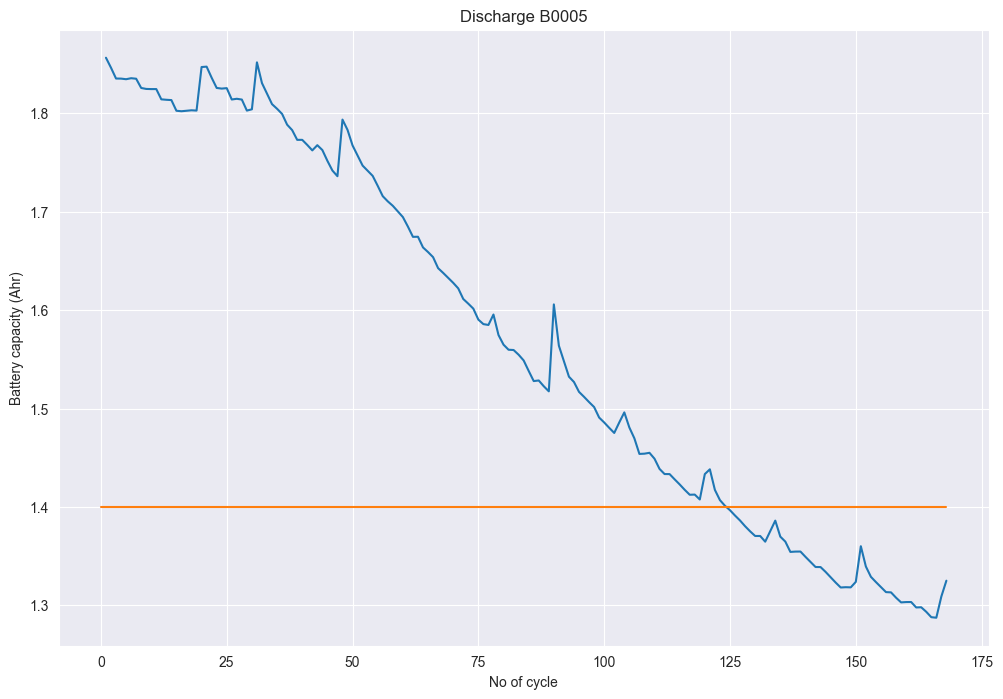

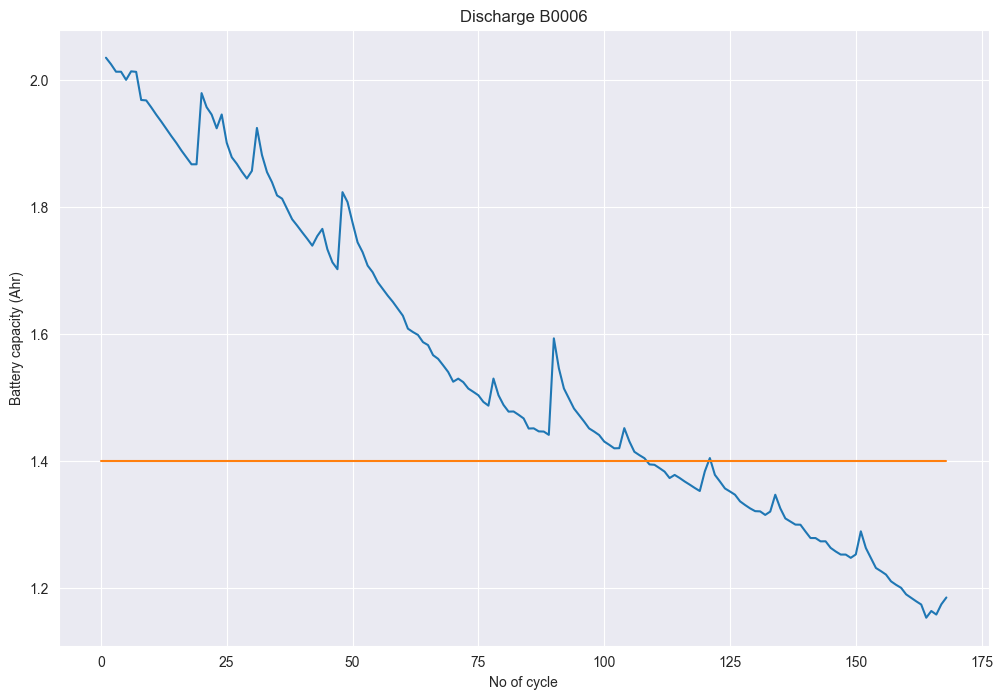

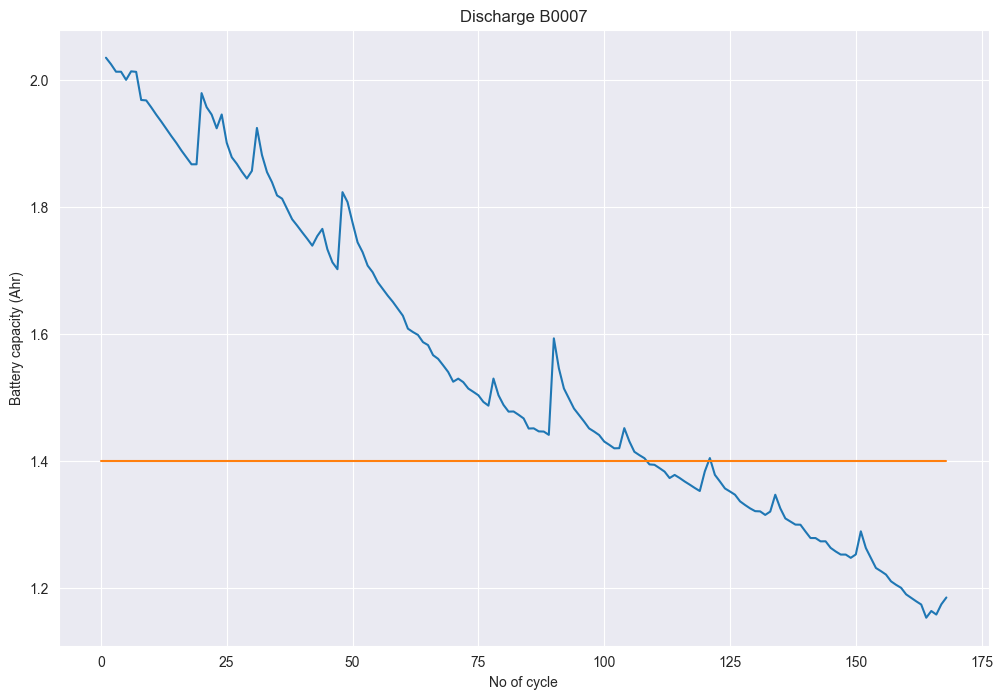

In [15]:
plot_df = capacity1.loc[(capacity1['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity1)], [1.4, 1.4])
plt.ylabel('Battery capacity (Ahr)')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('No of cycle')
plt.title('Discharge B0005')

plot_df = capacity2.loc[(capacity2['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity2)], [1.4, 1.4])
plt.ylabel('Battery capacity (Ahr)')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('No of cycle')
plt.title('Discharge B0006')

plot_df = capacity3.loc[(capacity3['cycle']>=1),['cycle','capacity']]
sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity3)], [1.4, 1.4])
plt.ylabel('Battery capacity (Ahr)')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('No of cycle')
plt.title('Discharge B0007')

attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity1[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

Text(0.5, 1.0, 'Discharge B0005')

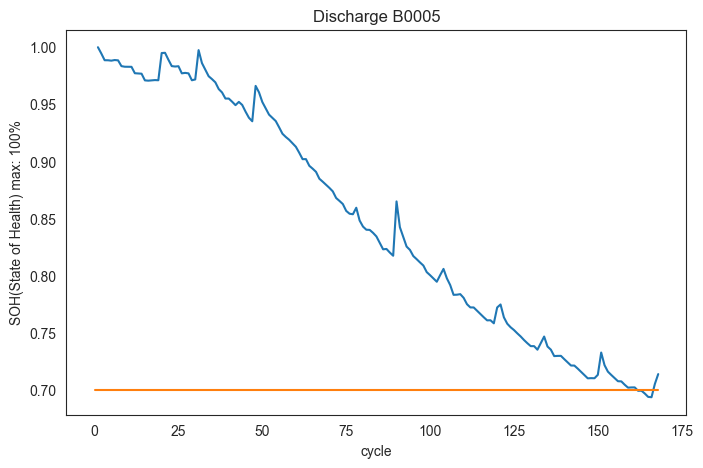

In [16]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("white")
plt.figure(figsize=(8, 5))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity1)], [0.70, 0.70])
plt.ylabel('SOH(State of Health) max: 100%')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [17]:
attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']

C1 = dataset1['capacity'][0]
soh1 = []
for i in range(len(dataset1)):
    soh1.append(dataset1['capacity'][i] / C1)
soh1 = pd.DataFrame(data=soh1, columns=['SoH'])
train_dataset1 = dataset1[attribs]
sc = MinMaxScaler(feature_range=(0,1))
train_dataset1 = sc.fit_transform(train_dataset1)
print(train_dataset1.shape)
print(soh1.shape)

C2 = dataset2['capacity'][0]
soh2 = []
for i in range(len(dataset2)):
    soh2.append(dataset2['capacity'][i] / C2)
soh2 = pd.DataFrame(data=soh2, columns=['SoH'])
train_dataset2 = dataset2[attribs]
sc = MinMaxScaler(feature_range=(0,1))
train_dataset2 = sc.fit_transform(train_dataset2)
print(train_dataset2.shape)
print(soh2.shape)

C3 = dataset3['capacity'][0]
soh3 = []
for i in range(len(dataset3)):
    soh3.append(dataset3['capacity'][i] / C3)
soh3 = pd.DataFrame(data=soh3, columns=['SoH'])
train_dataset3 = dataset3[attribs]
sc = MinMaxScaler(feature_range=(0,1))
train_dataset3 = sc.fit_transform(train_dataset3)
print(train_dataset3.shape)
print(soh3.shape)

(50285, 7)
(50285, 1)
(50285, 7)
(50285, 1)
(50285, 7)
(50285, 1)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, activation='relu', input_dim=train_dataset1.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1))
model.summary()
model.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_absolute_error')
model.fit(x=train_dataset1, y=soh1.to_numpy(), batch_size=25, epochs=50)
model.fit(x=train_dataset2, y=soh2.to_numpy(), batch_size=25, epochs=50)
model.fit(x=train_dataset3, y=soh3.to_numpy(), batch_size=25, epochs=50)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.2364
Epoch 2/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0294
Epoch 3/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0288
Epoch 4/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0283
Epoch 5/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0285
Epoch 6/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0285
Epoch 7/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0281
Epoch 8/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0282
Epoch 9/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0285
Epoch 10/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0283
Epoch 11/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0279
Epoch 12/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0280
Epoch 13/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0277
Epoch 14/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0283
Epoch 15/50
2012/2012 ━━━━━━━

2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0311
Epoch 30/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0309
Epoch 31/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0309
Epoch 32/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0311
Epoch 33/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0310
Epoch 34/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0312
Epoch 35/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0314
Epoch 36/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0315
Epoch 37/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0312
Epoch 38/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0308
Epoch 39/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0313
Epoch 40/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0307
Epoch 41/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0312
Epoch 42/50
2012/2012 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0312
Epoch 43/50
2012/2012 ━━━━━━━━━━

In [19]:
dataset_val, capacity_val = load_data('B0018')
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity']) / C
print(dataset_val.head(5))
print(dis_ele.head(5))

attrib=['capacity', 'voltage_measured', 'current_measured',
        'temperature_measured', 'current_load', 'voltage_load', 'time']
soh_pred = model.predict(sc.fit_transform(dataset_val[attrib]))
print(soh_pred.shape)

Total data in dataset:  319
[1, 24, datetime.datetime(2008, 7, 7, 15, 15, 28), 1.8550045207910817, 4.188108651124536, 0.00013066734156636677, 23.8195202516044, 0.0006, 0.0, 0.0]
   cycle  ambient_temperature            datetime  capacity  voltage_measured  \
0      1                   24 2008-07-07 15:15:28  1.855005          4.188109   
1      1                   24 2008-07-07 15:15:28  1.855005          4.188196   
2      1                   24 2008-07-07 15:15:28  1.855005          3.977432   
3      1                   24 2008-07-07 15:15:28  1.855005          3.961974   
4      1                   24 2008-07-07 15:15:28  1.855005          3.949835   

   current_measured  temperature_measured  current_load  voltage_load    time  
0          0.000131             23.819520        0.0006         0.000   0.000  
1          0.001459             23.828807        0.0006         4.203   9.422  
2         -2.005672             23.844944        1.9988         3.029  19.578  
3         -2.01

In [20]:
C = dataset_val['capacity'][0]
soh = []
for i in range(len(dataset_val)):
  soh.append(dataset_val['capacity'][i] / C)
new_soh = dataset_val.loc[(dataset_val['cycle'] >= 1), ['cycle']]
new_soh['SoH'] =  soh
new_soh['NewSoH'] = soh_pred
new_soh = new_soh.groupby(['cycle']).mean().reset_index()
print(new_soh.head(10))
rms = np.sqrt(mean_squared_error(new_soh['SoH'], new_soh['NewSoH']))
print('Root Mean Square Error: ', rms)

   cycle       SoH    NewSoH
0      1  1.000000  0.995324
1      2  0.993634  0.985496
2      3  0.991697  0.982490
3      4  0.986884  0.975043
4      5  0.987976  0.976749
5      6  0.985727  0.973265
6      7  0.981777  0.967168
7      8  0.978526  0.962137
8      9  0.972665  0.953069
9     10  0.982801  0.968752
Root Mean Square Error:  0.09026791082516797


Text(0.5, 1.0, 'Discharge B0018')

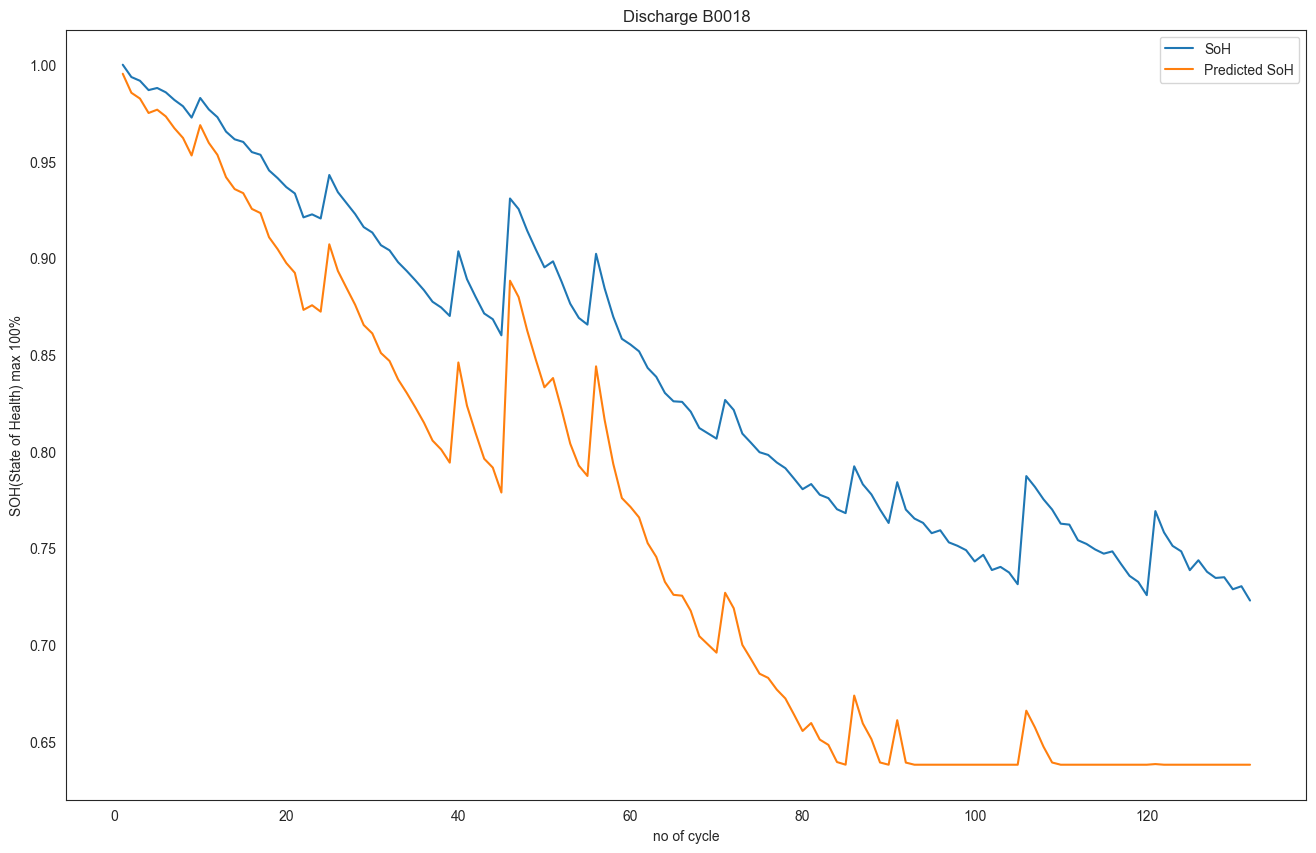

In [21]:
plot_df = new_soh.loc[(new_soh['cycle']>=1),['cycle','SoH', 'NewSoH']]
sns.set_style("white")
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['SoH'], label='SoH')
plt.plot(plot_df['cycle'], plot_df['NewSoH'], label='Predicted SoH')
#Draw threshold
#plt.plot([0.,len(capacity)], [0.70, 0.70], label='Threshold')
plt.ylabel('SOH(State of Health) max 100%')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('no of cycle')
plt.legend()
plt.title('Discharge B0018')

In [22]:
dataset_val, capacity_val = load_data('B0005')
attrib=['cycle', 'datetime', 'capacity']
dis_ele = capacity_val[attrib]
rows=['cycle','capacity']
dataset=dis_ele[rows]
data_train=dataset[(dataset['cycle']<50)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=50)]
data_set_test=data_test.iloc[:,1:2].values

sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
#take the last 10t to predict 10t+1
for i in range(10,49):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

Total data in dataset:  616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]


In [23]:
regress = Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200))
regress.add(Dropout(0.3))
regress.add(Dense(units=1))
regress.compile(optimizer='adam',loss='mean_squared_error')
regress.summary()
regress.fit(X_train,y_train,epochs=200,batch_size=25)

print(len(data_test))
data_total=pd.concat((data_train['capacity'], data_test['capacity']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(10,129):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred=regress.predict(X_test)
print(pred.shape)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test Root Mean Square Error: %.3f' % rmse)
print(f'R2 Score: {metrics.r2_score(tests,pred)}')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 10, 200)             │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 10, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 10, 200)             │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 10, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 10, 200)             │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 10, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,124,201 (4.29 MB)

 Trainable params: 1,124,201 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 0.3284
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1296 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1281 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0408 
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0761 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0639 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0464 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0534 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0630 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0442 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0448 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0523 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0432 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0435 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0475 
Epoc

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0389 
Epoch 83/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0348 
Epoch 84/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0375
Epoch 85/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0362 
Epoch 86/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0341 
Epoch 87/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0306 
Epoch 88/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0329 
Epoch 89/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0328 
Epoch 90/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0344 
Epoch 91/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0411 
Epoch 92/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0365 
Epoch 93/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0430 
Epoch 94/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0329 
Epoch 95/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0291 
Epoch 96/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0358 
Epoch 97/

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0342
Epoch 163/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0255 
Epoch 164/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0366 
Epoch 165/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0335 
Epoch 166/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0310 
Epoch 167/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0244 
Epoch 168/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0303 
Epoch 169/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0288 
Epoch 170/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0265 
Epoch 171/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0249 
Epoch 172/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0314 
Epoch 173/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0278 
Epoch 174/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0308 
Epoch 175/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0276 
Epoch 176/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0

The Actual fail at cycle number: 128
The prediction fail at cycle number: 142
The error of RUL= 14 Cycle(s)


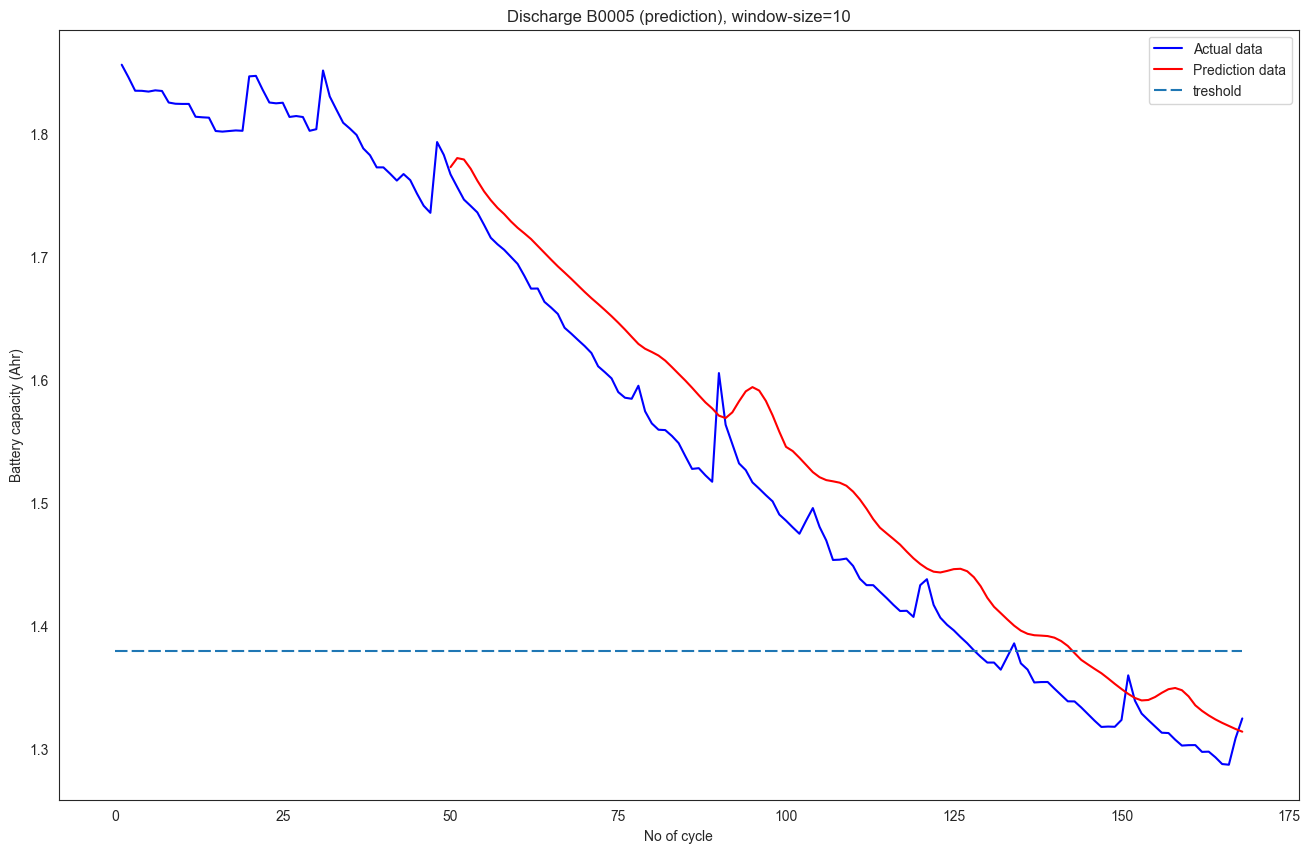

In [24]:
ln = len(data_train)
data_test['pre']=pred
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','capacity']]
plot_per = data_test.loc[(data_test['cycle']>=ln),['cycle','pre']]
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['pre'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
plt.ylabel('Battery capacity (Ahr)')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('No of cycle')
plt.legend()
plt.title('Discharge B0005 (prediction), window-size=10')
pred=0
Afil=0
Pfil=0
a=data_test['capacity'].values
b=data_test['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break
print("The Actual fail at cycle number: "+ str(Afil+ln))
print("The prediction fail at cycle number: "+ str(Pfil+ln))
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")